# 1-Load Dataset

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.stats import entropy
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from math import log

dataset = pd.read_csv(r'C:\Users\vip\Downloads\income-1 (1).csv')
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

print(numeric_data)
numeric_data.head()

    Age  Income($)
0    27      70000
1    29      90000
2    29      61000
3    28      60000
4    42     150000
5    39     155000
6    41     160000
7    38     162000
8    36     156000
9    35     130000
10   37     137000
11   26      45000
12   27      48000
13   28      51000
14   29      49500
15   32      53000
16   40      65000
17   41      63000
18   43      64000
19   39      80000
20   41      82000
21   39      58000


,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


# 2-Cluster Cohesion

In [51]:
# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(numeric_data)

# Calculate the cluster cohesion (inertia)
cohesion = kmeans.inertia_

print("Cluster cohesion:", cohesion)



C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster cohesion: 1577046058.883117


# 3-Cluster Separation


C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0]


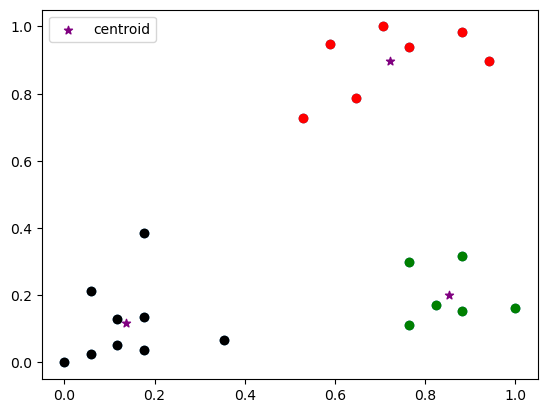

In [52]:
scaler = MinMaxScaler()

scaler.fit(numeric_data[['Income($)']])
numeric_data['Income($)'] = scaler.transform(numeric_data[['Income($)']])

scaler.fit(numeric_data[['Age']])
numeric_data['Age'] = scaler.transform(numeric_data[['Age']])
numeric_data.head()
plt.scatter(numeric_data.Age, numeric_data['Income($)'])
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(numeric_data[['Age', 'Income($)']])
y_predicted
numeric_data['cluster'] = y_predicted
numeric_data.head()

km.cluster_centers_

print(km.labels_)
df1 = numeric_data[numeric_data.cluster == 0]
df2 = numeric_data[numeric_data.cluster == 1]
df3 = numeric_data[numeric_data.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()

# 4-Silhouette Coefficient

In [53]:
score = silhouette_score(numeric_data, km.labels_)
print("Silhouette Coefficient:", score)

Silhouette Coefficient: 0.8440849267382081


# 5-Similarity Matrix

In [54]:
# Calculate similarity matrix
similarity_matrix = 1 - pairwise_distances(numeric_data, metric='cosine')
print("Similarity matrix:", similarity_matrix)


Similarity matrix: [[1.         0.99489069 0.99756043 0.99867027 0.68072759 0.7103483
  0.67850744 0.7090629  0.74188161 0.80804716 0.76815085 0.99391631
  0.99562515 0.99630952 0.9944908  0.98688861 0.0502041  0.04703795
  0.04587601 0.06590882 0.06334537 0.0441977 ]
 [0.99489069 1.         0.99265652 0.99173271 0.74882108 0.77726113
  0.74813566 0.77655598 0.8057769  0.86322083 0.82827349 0.97834072
  0.98278603 0.98621441 0.98556506 0.98423241 0.12276025 0.11735796
  0.11536594 0.1489335  0.14473987 0.11247999]
 [0.99756043 0.99265652 1.         0.99956565 0.69329568 0.71586495
  0.68690443 0.710924   0.74056376 0.81033967 0.77352666 0.99382725
  0.99676468 0.99867394 0.99880696 0.9956678  0.09967132 0.09805963
  0.09744932 0.10642056 0.10547588 0.09655044]
 [0.99867027 0.99173271 0.99956565 1.         0.67583694 0.70079215
  0.67043819 0.69686832 0.72816348 0.79846765 0.75977227 0.99623668
  0.99826532 0.99926612 0.998572   0.99284922 0.07035815 0.06870049
  0.06808094 0.07784008 0

# 6-Correlation

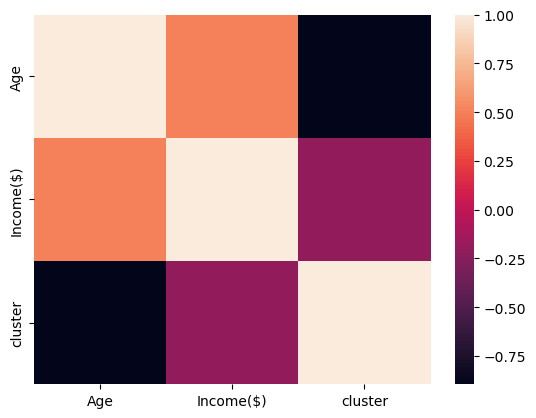

In [55]:
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix)
plt.show()


# 7-SSE

C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

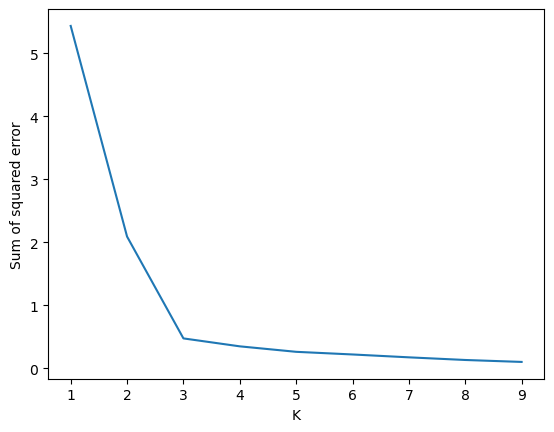

In [56]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(numeric_data[['Age', 'Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()


# 8-entropy

In [57]:
label_counts = np.bincount(km.labels_)  # count the number of occurrences for each label
label_probs = label_counts / len(km.labels_)  # compute the probability distribution
entropy_value = entropy(label_probs, base=2)  # compute the entropy
print(" Entropy:", entropy_value)

 Entropy: 3.0271691184406184


# 9-Purity

In [58]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


purity = purity_score(km.labels_, y_predicted)
print("Purity:", purity)


Purity: 0.5
